## 다중 분류 문제 - 뉴스 기사 분류
- 로이터 뉴스를 46개의 상호 배타적인 토픽으로 분류하는 신경망 생성
- single-label, multiclass classification임 (한 데이터가 하나의 범주로 분류)

### 로이터 데이터 셋


In [1]:
# 데이터 로드
from keras.datasets import reuters

(train_data, train_labels),(test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [2]:
print("훈련 샘플 수 : ", len(train_data))
print("테스트 샘플 수 : ", len(test_data))

훈련 샘플 수 :  8982
테스트 샘플 수 :  2246


### 데이터 준비

In [4]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence]=1
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
# 저번에 이진분류라서 바로 vectorize_sequences에 넣었지만
# 이번에는 다중분류이기 때문에 원 핫 인코딩 수행
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label]=1
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [6]:
# 케라스 내장 함수 이용
# from keras.utils.np_utils import to_categorical

# one_hot_train_labels = to_categorical(train_labels)
# one_hot_test_labels = to_categorical(test_labels)

### 모델 구성
- 지난 예시에서는 16개의 유닛 사용
- 이번에는 64개의 유닛 사용

In [7]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [11]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### 훈련 검증

In [12]:
# validation set 준비
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [13]:
# 모델 훈련
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 58ms/step - loss: 2.7518 - accuracy: 0.5060 - val_loss: 1.8198 - val_accuracy: 0.6380
Epoch 2/20
16/16 [==============================] - 1s 44ms/step - loss: 1.4595 - accuracy: 0.7030 - val_loss: 1.3511 - val_accuracy: 0.7060
Epoch 3/20
16/16 [==============================] - 1s 43ms/step - loss: 1.0710 - accuracy: 0.7711 - val_loss: 1.1663 - val_accuracy: 0.7460
Epoch 4/20
16/16 [==============================] - 1s 42ms/step - loss: 0.8469 - accuracy: 0.8224 - val_loss: 1.1007 - val_accuracy: 0.7710
Epoch 5/20
16/16 [==============================] - 1s 42ms/step - loss: 0.6778 - accuracy: 0.8518 - val_loss: 1.0133 - val_accuracy: 0.7920
Epoch 6/20
16/16 [==============================] - 1s 44ms/step - loss: 0.5491 - accuracy: 0.8807 - val_loss: 0.9543 - val_accuracy: 0.8060
Epoch 7/20
16/16 [==============================] - 1s 43ms/step - loss: 0.4415 - accuracy: 0.9087 - val_loss: 0.9394 - val_accuracy: 0.8090
Epoch 8/20
16

In [17]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

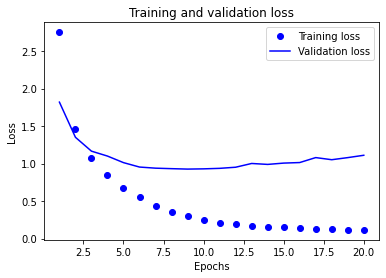

In [14]:
# 훈련과 검증 손실 그리기
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss') # bo : 파란 점
plt.plot(epochs, val_loss, 'b', label='Validation loss') # b : 파란 실선
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

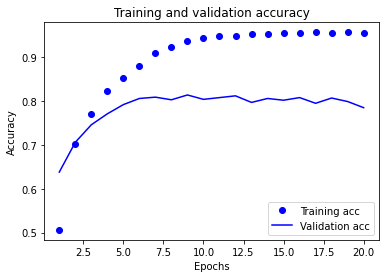

In [18]:
# 훈련과 검증 정확도 그리기

plt.clf() # 그래프 초기화
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc') # bo : 파란 점
plt.plot(epochs, val_acc, 'b', label='Validation acc') # b : 파란 실선
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

- 9 에폭 이후 과대적합 시작
- 9번의 에폭으로 새로운 모델 훈련 & 테스트 셋으로 평가 수행

In [21]:
# 모델 처음부터 9에폭 동안만 훈련하기
from keras import optimizers
from keras import losses
from keras import metrics

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.categorical_crossentropy,
              metrics=[metrics.categorical_accuracy])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 61ms/step - loss: 2.7522 - categorical_accuracy: 0.5144 - val_loss: 1.8359 - val_categorical_accuracy: 0.6560
Epoch 2/9
16/16 [==============================] - 1s 43ms/step - loss: 1.4882 - categorical_accuracy: 0.7078 - val_loss: 1.3484 - val_categorical_accuracy: 0.7090
Epoch 3/9
16/16 [==============================] - 1s 41ms/step - loss: 1.0812 - categorical_accuracy: 0.7704 - val_loss: 1.1585 - val_categorical_accuracy: 0.7490
Epoch 4/9
16/16 [==============================] - 1s 43ms/step - loss: 0.8491 - categorical_accuracy: 0.8182 - val_loss: 1.0795 - val_categorical_accuracy: 0.7610
Epoch 5/9
16/16 [==============================] - 1s 43ms/step - loss: 0.6755 - categorical_accuracy: 0.8637 - val_loss: 0.9708 - val_categorical_accuracy: 0.8020
Epoch 6/9
16/16 [==============================] - 1s 42ms/step - loss: 0.5354 - categorical_accuracy: 0.8946 - val_loss: 0.9593 - val_categorical_accuracy: 0.8030
Epoch 7/9
16/16 

In [22]:
results

[0.9932776689529419, 0.7849510312080383]

### 새로운 데이터에 대해 예측하기
- 생성한 모델은 46개의 토픽에 대한 확률 분포 반환
- 이번에는 테스트 데이터 전체에 대한 토픽 예측

In [23]:
predictions = model.predict(x_test)

In [25]:
predictions.shape

(2246, 46)

In [26]:
np.sum(predictions[0])

1.0

In [27]:
np.argmax(predictions[0])

3

### 레이블과 손실을 다루는 다른 방법
1. 이전 방법 : **원핫 인코딩 -> 손실함수는 categorical_crossentropy**
2. 다른 방법 : **정수 텐서로 변환 -> 손실함수는 sparse_categorical_crossentropy**

In [28]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [29]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])